In [2]:
# Importing libraries
import networkx as nx # Library for containing graphs
import osmnx as ox # Library for open street maps
from random import randint # Random
import matplotlib.pyplot as plt # Plots

# Study Area
min_lat = 39.84
min_lon = 116.30
max_lat = 39.97
max_lon = 116.46

In [3]:
# Getting study area graph (with roads for cars)
G = ox.graph_from_bbox(bbox=(min_lat, max_lat, min_lon, max_lon), network_type='drive')

In [18]:
G.edges(data=True)

OutMultiEdgeDataView([(25585055, 533650673, {'osmid': 8365687, 'name': '人大会堂西路', 'highway': 'tertiary', 'oneway': False, 'reversed': False, 'length': 220.67600000000002, 'geometry': <LINESTRING (116.386 39.902, 116.386 39.902, 116.386 39.902, 116.386 39.902,...>}), (25585055, 8835880543, {'osmid': 127844311, 'name': '人大会堂西路', 'highway': 'tertiary', 'oneway': False, 'reversed': True, 'length': 437.33500000000004, 'geometry': <LINESTRING (116.386 39.902, 116.386 39.902, 116.386 39.902, 116.386 39.903,...>}), (25585055, 342791346, {'osmid': 161809912, 'name': '人大会堂西路', 'highway': 'tertiary', 'oneway': False, 'reversed': False, 'length': 65.7, 'geometry': <LINESTRING (116.386 39.902, 116.385 39.902, 116.385 39.902, 116.385 39.902,...>}), (25585083, 1414035094, {'osmid': 161809903, 'oneway': True, 'highway': 'primary_link', 'reversed': False, 'length': 19.111}), (25585083, 9378036221, {'osmid': 1145602707, 'oneway': True, 'name': '前门西大街', 'highway': 'primary', 'reversed': False, 'length': 1

In [5]:
# Two random points on the map which I will use to calculate route
point1 = list(G.nodes)[randint(0, len(G.nodes)-1)]
point2 = list(G.nodes)[randint(0, len(G.nodes)-1)]

In [6]:
# Calculating shortest path between two points with dijkstra algorithm
shortest_path = nx.shortest_path(G, target=point1, source=point2, method="dijkstra", weight='length')
# Printing nodes in the shortest path
print("Shortest path:", shortest_path)

Shortest path: [330844788, 330844789, 330844790, 72758365, 1410718544, 124174677, 1298058591, 72758368, 1298058551, 9296390429, 9296390430, 9296390428, 8721973736, 10933449855, 2010691736, 754517154, 1719003213, 27547596, 754516083, 9379044809, 9379044812, 9379044816, 9379044815, 124173670, 331148077, 1253535271, 1253535131, 1253535259, 754515422, 1737702613, 10971713687, 10971713689, 656086887, 656086884, 656086879, 656086877, 656086946, 340061667, 656068147, 64490206, 1190930403, 1528034334, 1528034336, 385076483, 734045313, 530640508, 734046234, 530640513, 734045769, 1687193386, 10068907124, 10068907127, 1356404865, 1356404877, 1356404880, 9278125587, 1356404915, 1687193391, 1356404930, 1687193406, 1687193428, 1356404945, 1356404947, 5264080674, 5264080678, 5264080679, 5264080683, 5264080676, 5264080689, 5264080690]


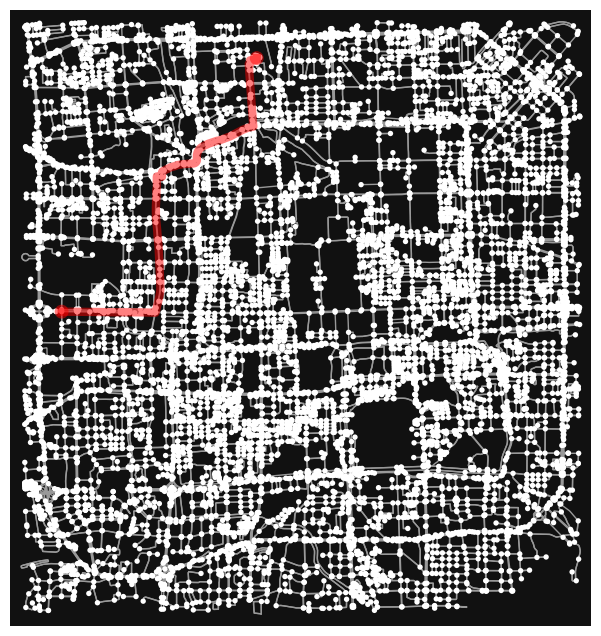

In [19]:
# Figure 1: Road network plot using OSMnx
fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=6, route_color='r')

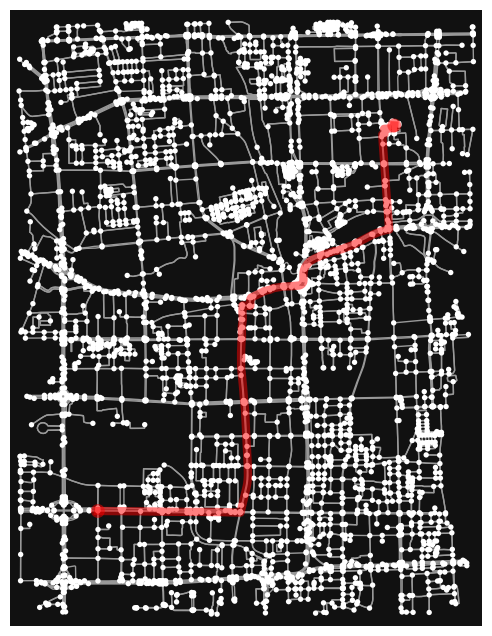

In [8]:
# Figure 2: Scaled map of our route
list_shortest_path = list(shortest_path)
G_path = G.subgraph(shortest_path)
# Creating new mini graph (using x and y from start and end of the route. also adding 0.015 to have more place)
G_mini = ox.graph_from_bbox(bbox=(G.nodes[list_shortest_path[0]]["y"]-0.015, G.nodes[list_shortest_path[-1]]["y"]+0.015, G.nodes[list_shortest_path[0]]["x"]-0.015, G.nodes[list_shortest_path[-1]]["x"]+0.015), network_type='drive')
fig2, ax2 = ox.plot_graph_route(G_mini, shortest_path, route_linewidth=6, route_color='r')

Text(0.5, 1.0, 'Histogram of Edge Lengths')

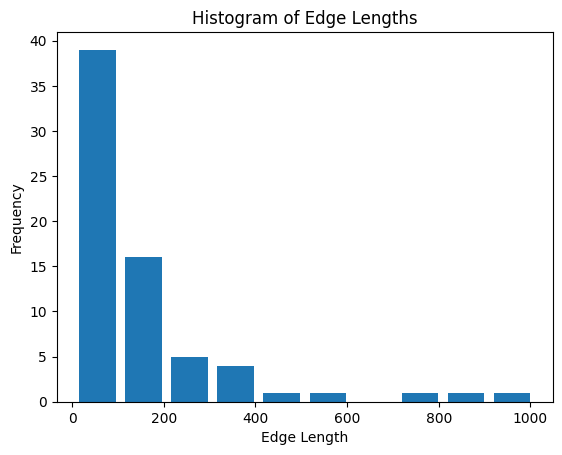

In [9]:
# Figure 3: Histogram of edge lengths 
# Calculate the lengths of edges
edge_lengths = [G.get_edge_data(list_shortest_path[i], list_shortest_path[i + 1])[0]['length'] for i in range(len(list_shortest_path) - 1)]
# Create a histogram of edge lengths
plt.hist(edge_lengths, rwidth=0.8, histtype='bar')
plt.xlabel('Edge Length')
plt.ylabel('Frequency')
plt.title('Histogram of Edge Lengths')

Text(0.5, 1.0, 'Bars of Edge Types')

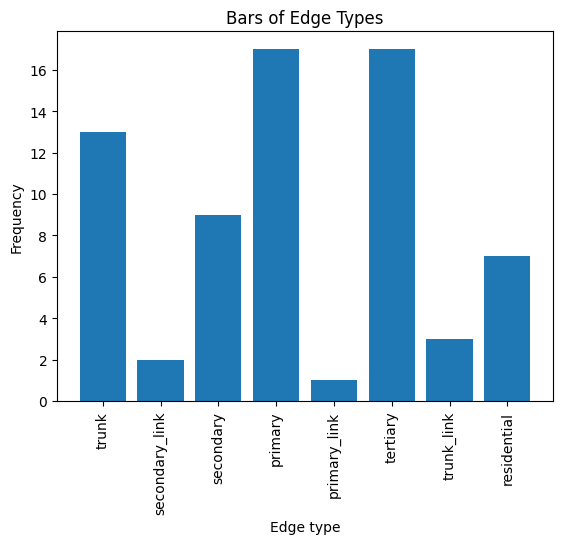

In [10]:
# Figure 4: Bars of different types of roads 
edge_types = [G.get_edge_data(list_shortest_path[i], list_shortest_path[i + 1])[0]['highway'] for i in range(len(list_shortest_path) - 1)]
for i in range(len(edge_types)):
    if type(edge_types[i]) != str:
        edge_types[i] = ''
edge_types = list(filter(None, edge_types))
# Create bars
type_counts = {}
for t in edge_types:
    type_counts[t] = type_counts.get(t, 0) + 1

type_labels = list(type_counts.keys())
frequencies = list(type_counts.values())
plt.bar(type_labels, frequencies)
plt.xticks(rotation='vertical')
plt.xlabel('Edge type')
plt.ylabel('Frequency')
plt.title('Bars of Edge Types')

In [11]:
# Saving graph and shortest path for QGIS
ox.save_graph_geopackage(G, 'map')
ox.save_graph_geopackage(G_path, 'shortest_path')

Presenting graph in QGIS

![title](img/img.png)